In [9]:
import tensorflow as tf
import pandas as pd

csv_path='/content/wheat_price.csv'

data = pd.read_csv(csv_path)
data.shape

(24, 7)

In [10]:
data.describe()

,year,average_temperature,rainfall,crude_oil_price,wheat_production,inflation,wheat_price
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,2009.500000,24.920000,1119.125417,57.414167,83845.333333,6.405000,1106.041667
std,7.071068,0.263802,96.845977,26.383435,13747.181399,2.987325,497.143972
min,1998.000000,24.190000,908.100000,14.420000,65761.000000,3.330000,475.000000
25%,2003.750000,24.785000,1051.147500,37.530000,71939.000000,3.992500,620.000000
50%,2009.500000,24.925000,1121.340000,56.815000,80741.500000,5.040000,1090.000000
75%,2015.250000,25.012500,1187.720000,74.125000,95124.000000,8.477500,1468.750000
max,2021.000000,25.480000,1320.910000,99.670000,109586.000000,13.230000,1975.000000


In [11]:
data.isnull().sum()

year                   0
average_temperature    0
rainfall               0
crude_oil_price        0
wheat_production       0
inflation              0
wheat_price            0
dtype: int64

In [12]:
data.corr()

,year,average_temperature,rainfall,crude_oil_price,wheat_production,inflation,wheat_price
year,1.000000,0.305105,0.469755,0.478522,0.927596,-0.060925,0.983794
average_temperature,0.305105,1.000000,-0.140069,0.111116,0.159466,-0.148775,0.249951
rainfall,0.469755,-0.140069,1.000000,0.325554,0.420622,0.313317,0.464747
crude_oil_price,0.478522,0.111116,0.325554,1.000000,0.418322,0.404088,0.403150
wheat_production,0.927596,0.159466,0.420622,0.418322,1.000000,-0.028710,0.962742
inflation,-0.060925,-0.148775,0.313317,0.404088,-0.028710,1.000000,-0.037721
wheat_price,0.983794,0.249951,0.464747,0.403150,0.962742,-0.037721,1.000000


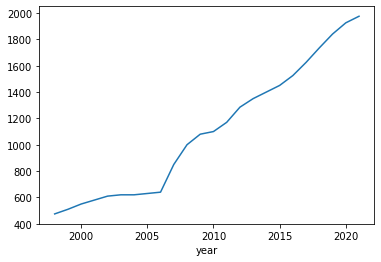

In [13]:
data.groupby('year').mean()['wheat_price'].plot()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


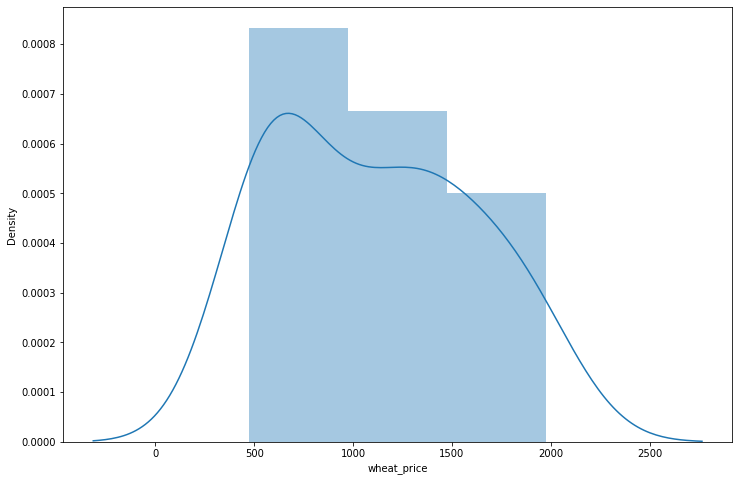

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
sns.distplot(data['wheat_price'])


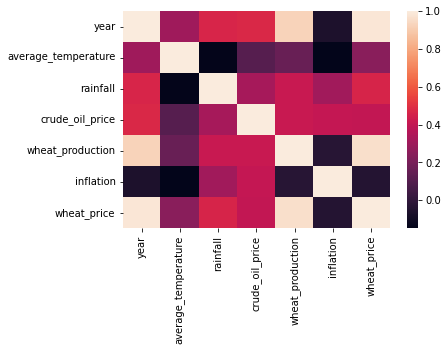

In [15]:
sns.heatmap(data.corr())

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
type(data)

pandas.core.frame.DataFrame

In [18]:
data.dtypes


year                     int64
average_temperature    float64
rainfall               float64
crude_oil_price        float64
wheat_production         int64
inflation              float64
wheat_price              int64
dtype: object

In [19]:
numeric_feature_names=['year','average_temperature','rainfall','crude_oil_price','wheat_production','inflation','wheat_price']
numeric_features = data[numeric_feature_names]
numeric_features.head()
X_df = data.drop(columns=['year','wheat_price'],axis = 1)
y_df = data['wheat_price']

X_df.head(), y_df.head()

(   average_temperature  rainfall  crude_oil_price  wheat_production  inflation
 0                24.19   1187.06            14.42             66350      13.23
 1                24.94   1062.54            19.35             71288       4.67
 2                24.82   1041.99            30.38             76369       4.01
 3                24.71   1024.41            25.98             69681       3.78
 4                25.09    908.10            26.19             72766       4.30,
 0    475
 1    510
 2    550
 3    580
 4    610
 Name: wheat_price, dtype: int64)

In [20]:
tf_data = tf.convert_to_tensor(numeric_features)
X = tf.convert_to_tensor(X_df,dtype=tf.float32)
y= tf.expand_dims(tf.convert_to_tensor(y_df,dtype=tf.float32),axis=1)

X.shape, y.shape

(TensorShape([24, 5]), TensorShape([24, 1]))

In [21]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X_df,y_df,test_size=0.2,random_state=42)
len(X_df),len(X_train), len(y_df), len(y_train)

(24, 19, 24, 19)

In [22]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler

ct = make_column_transformer(
    (MinMaxScaler(), ['average_temperature','rainfall','crude_oil_price','wheat_production','inflation'])
)

X_df = data.drop(columns=['year','wheat_price'],axis=1)
y_df = data['wheat_price']

X_train,X_test, y_train,y_test = train_test_split(X_df,y_df,test_size=0.2,random_state=42)
len(X_df),len(X_train), len(y_df), len(y_train)

ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)




In [32]:
y_train.values

array([ 850, 1170,  510, 1840,  620,  550, 1100, 1350,  580,  610, 1925,
       1450, 1735, 1975,  630, 1000, 1285, 1625,  620])

In [44]:
price_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(25,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1)
])
price_model_1.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam())
price_model_1.fit(X_train_normal,y_train,validation_data=(X_test_normal,y_test),epochs=1000,verbose=0)

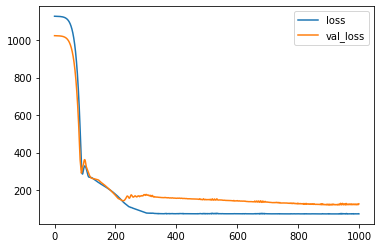

In [45]:
pd.DataFrame(price_model_1.history.history).plot()

In [46]:
price_model_1.evaluate(X_test_normal,y_test)

1/1 [==============================] - 0s 29ms/step - loss: 126.0866


126.0866470336914

In [47]:
predictions = price_model_1.predict(X_test_normal)
predictions

1/1 [==============================] - 0s 73ms/step


array([[ 726.46674],
       [1393.5956 ],
       [ 418.547  ],
       [1233.1786 ],
       [ 890.71234]], dtype=float32)

In [48]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

mean_absolute_error(y_test,predictions)

126.0866455078125

In [49]:
explained_variance_score(y_test,predictions)

0.893609670008709

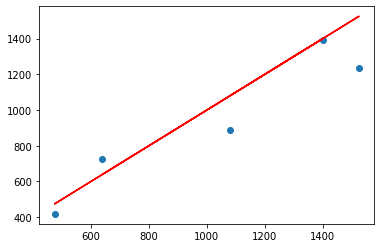

In [50]:
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [51]:
price_model_1.save('wheat_price_model.h5')

In [52]:
X_test_normal
price_model_1.predict(tf.expand_dims(X_test_normal[0],axis=0))

1/1 [==============================] - 0s 77ms/step


array([[726.46655]], dtype=float32)

In [53]:
X_test.loc[0], y_test[0]

(average_temperature       24.19
 rainfall                1187.06
 crude_oil_price           14.42
 wheat_production       66350.00
 inflation                 13.23
 Name: 0, dtype: float64, 475)

In [54]:
predict_df = pd.DataFrame({'average_temperature':[24.19],'rainfall':[1187.06],'crude_oil_price':[14.42],'wheat_production':[66350.00],'inflation':[13.23]})
predict_df

predictData_normal= ct.transform(predict_df)
predictData_normal
price_model_1.predict(predictData_normal)[0][0]

1/1 [==============================] - 0s 18ms/step


418.547